# Normal Approximation in 2D
If your input data only includes a set of points and no normal vectors, `lsdo_genie` provides utilities for you to approximate your normal vectors.
The two leading methods to process your points is to (1) use the midpoints of each segment and normal vectors of th edges, and/or (2) generate normal vectors at the verticies as an average between the two neighboring edges

The following utilties generate normal vectors based on the following rule:
* If the points flow clockwise, the normal vectors point outwards
* If counter-clockwise, the normal vectors point inwards

## Define a set of points in clockwise order

In [1]:
import numpy as np
import matplotlib.pyplot as plt
clockwise_points = np.array([
    [10.        , 4.13619728],
    [ 8.34605869, 4.21052632],
    [ 6.84210526, 3.70084407],
    [ 6.31578947, 2.58397925],
    [ 4.73684211, 2.92381402],
    [ 4.9240031 , 4.21052632],
    [ 4.21052632, 5.43612266],
    [ 4.73684211, 6.65612795],
    [ 4.72569161, 7.89473684],
    [ 3.98321809, 9.47368421],
    [ 5.26315789, 9.8343276 ],
    [ 6.84210526, 9.2020613 ],
    [ 7.36842105, 7.76377389],
    [ 7.94206498, 6.31578947],
    [ 8.94736842, 4.91640485],
])

## Midpoint normal approximation
This function approximates the normal vectors for each midpoint between a closed set of points by using the normal to the edge. This prioritizes normal vector accuracy, but not point accuracy.

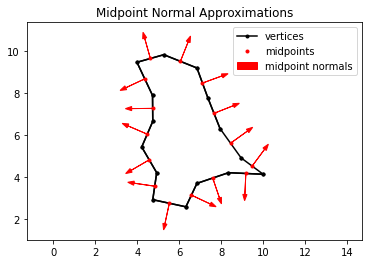

In [2]:
from lsdo_genie.utils import midpoint_normal_approx
midpoints, midpoint_normals = midpoint_normal_approx(clockwise_points)

plt.figure()
plt.plot(clockwise_points[:,0],clockwise_points[:,1],'k.-', label="vertices")
closure = np.roll(clockwise_points,shift=1,axis=0)
plt.plot(closure[:,0],closure[:,1],'k.-')
plt.plot(midpoints[:,0],midpoints[:,1],'r.', label="midpoints")
show_label = True
for (x,y),(nx,ny) in zip(midpoints, midpoint_normals):
    if show_label:
        plt.arrow(x, y, nx, ny, color='r', head_width=.2, label="midpoint normals")
        show_label = False
    else: 
        plt.arrow(x, y, nx, ny, color='r', head_width=.2)
plt.title("Midpoint Normal Approximations")
plt.legend()
plt.axis('equal')

plt.show()

## Vertex normal approximation
This function approximates the normal vectors for each vertex by taking the average between the two neighboring edges. This prioritizes point accuracy, but not normal vector accuracy.

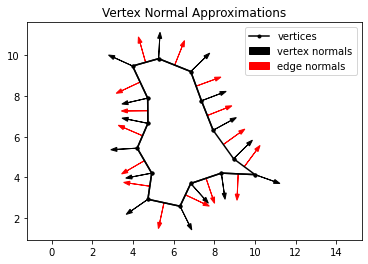

In [3]:
from lsdo_genie.utils import vertex_normal_approx
vertex_normals = vertex_normal_approx(clockwise_points)

plt.figure()
plt.plot(clockwise_points[:,0],clockwise_points[:,1],'k.-', label="vertices")
closure = np.roll(clockwise_points,shift=1,axis=0)
plt.plot(closure[:,0],closure[:,1],'k.-')
show_label = True
for (x,y),(nx,ny) in zip(clockwise_points, vertex_normals):
    if show_label:
        plt.arrow(x, y, nx, ny, color='k', head_width=.2, label="vertex normals")
        show_label = False
    else: 
        plt.arrow(x, y, nx, ny, color='k', head_width=.2)
show_label = True
for (x,y),(nx,ny) in zip(midpoints, midpoint_normals):
    if show_label:
        plt.arrow(x, y, nx, ny, color='r', head_width=.2, label="edge normals")
        show_label = False
    else: 
        plt.arrow(x, y, nx, ny, color='r', head_width=.2)
plt.title("Vertex Normal Approximations")
plt.legend()
plt.axis('equal')

plt.show()

## Reversing directions
Simply reverse the direction of your input points to get normal vectors oriented in the direction of your choosing.

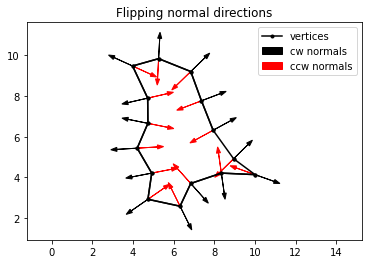

In [4]:
counterclockwise_points = clockwise_points[::-1]
new_normals = vertex_normal_approx(counterclockwise_points)

plt.figure()
plt.plot(clockwise_points[:,0],clockwise_points[:,1],'k.-', label="vertices")
closure = np.roll(clockwise_points,shift=1,axis=0)
plt.plot(closure[:,0],closure[:,1],'k.-')
show_label = True
for (x,y),(nx,ny) in zip(clockwise_points, vertex_normals):
    if show_label:
        plt.arrow(x, y, nx, ny, color='k', head_width=.2, label="cw normals")
        show_label = False
    else: 
        plt.arrow(x, y, nx, ny, color='k', head_width=.2)
show_label = True
for (x,y),(nx,ny) in zip(counterclockwise_points, new_normals):
    if show_label:
        plt.arrow(x, y, nx, ny, color='r', head_width=.2, label="ccw normals")
        show_label = False
    else: 
        plt.arrow(x, y, nx, ny, color='r', head_width=.2)
plt.title("Flipping normal directions")
plt.legend()
plt.axis('equal')

plt.show()

## For best results
For best results, it is recommended to include both vertex points and midpoints in your final dataset. As a result, you may recusively increase the resolution of your point cloud using linear interpolation between points.

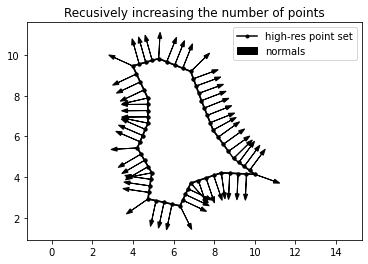

In [5]:
surface_points = np.copy(clockwise_points)
while len(surface_points) < 60:
    midpoints, _ = midpoint_normal_approx(surface_points)
    temp_points = np.zeros((2*len(surface_points),2))
    temp_points[1::2] = surface_points
    temp_points[0::2] = midpoints
    surface_points = temp_points

normals = vertex_normal_approx(surface_points)

plt.figure()
plt.plot(surface_points[:,0],surface_points[:,1],'k.-', label="high-res point set")
closure = np.roll(surface_points,shift=1,axis=0)
plt.plot(closure[:,0],closure[:,1],'k.-')
show_label = True
for (x,y),(nx,ny) in zip(surface_points, normals):
    if show_label:
        plt.arrow(x, y, nx, ny, color='k', head_width=.2, label="normals")
        show_label = False
    else: 
        plt.arrow(x, y, nx, ny, color='k', head_width=.2)
plt.title("Recusively increasing the number of points")
plt.legend()
plt.axis('equal')

plt.show()

## Beware!
Vertex normal approximation can go poorly! For example, many point clouds include corners, where a normal vectors are undefined. For these corner point cases, we recommend using midpoint normal approximation.

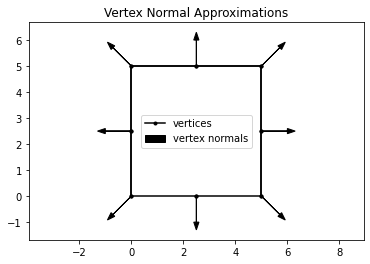

In [6]:
vertex_points = np.array([
    [0,0], [0,2.5],
    [0,5], [2.5,5],
    [5,5], [5,2.5],
    [5,0], [2.5,0],
])

vertex_normals = vertex_normal_approx(vertex_points)

plt.figure()
plt.plot(vertex_points[:,0],vertex_points[:,1],'k.-', label="vertices")
closure = np.roll(vertex_points,shift=1,axis=0)
plt.plot(closure[:,0],closure[:,1],'k.-')
show_label = True
for (x,y),(nx,ny) in zip(vertex_points, vertex_normals):
    if show_label:
        plt.arrow(x, y, nx, ny, color='k', head_width=.2, label="vertex normals")
        show_label = False
    else: 
        plt.arrow(x, y, nx, ny, color='k', head_width=.2)
plt.title("Vertex Normal Approximations")
plt.legend()
plt.axis('equal')

plt.show()